In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# conda list
from tensorflow import keras

In [3]:
keras.__version__

'2.5.0'

In [4]:
# import np_utils
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential,load_model
from sklearn import preprocessing
from tensorflow.keras.layers import Dense, Dropout

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
import zipfile
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('newfinal.csv')

In [8]:
df.head()

PK   NS GENDER  STUDY TIME RESOUCES  ABSENCES EXTRA CLASS MD FACILITIES  \
0  yes   no      M           5      yes        89          no  P          A   
1   no   no      M           1       no        11         yes  T          A   
2   no  yes      M           1      yes       100         yes  T          A   
3  yes  yes      M           4      yes        13          no  P          A   
4  yes   no      M           3       no        18         yes  T          A   

   201C.A  201 EXAM  202C.A  202 EXAM  305C.A  305 EXAM  
0      10         7      18         4      18         4  
1      27        54      20        20      20        20  
2      16        25      23        45      23        45  
3      19        27      18        22      18        22  
4      19        24      21        29      21        29

In [9]:
df['MD'].unique()

array(['P', 'T', 'PT'], dtype=object)

In [10]:
df.columns

Index(['PK', 'NS', 'GENDER', 'STUDY TIME', 'RESOUCES', 'ABSENCES',
       'EXTRA CLASS', 'MD', 'FACILITIES', '201C.A', '201 EXAM', '202C.A',
       '202 EXAM', '305C.A', '305 EXAM'],
      dtype='object')

In [11]:
df_target = df['305 EXAM']
df_target

0       4
1      20
2      45
3      22
4      29
       ..
100    32
101    21
102    17
103    22
104    45
Name: 305 EXAM, Length: 105, dtype: int64

In [12]:
# dropping taget variable
df.drop(['305 EXAM'],axis=1,inplace=True)

In [13]:
# droping corelated columns for model complexity
df.drop(['PK', 'NS','FACILITIES','ABSENCES'], axis=1, inplace=True)

In [14]:
print(len(df.columns))
df.columns

10


Index(['GENDER', 'STUDY TIME', 'RESOUCES', 'EXTRA CLASS', 'MD', '201C.A',
       '201 EXAM', '202C.A', '202 EXAM', '305C.A'],
      dtype='object')

In [15]:
# dividing dataset into numerical and categorical dataset
num_df = df.loc[:,df.dtypes!=np.object]
cat_df = df.loc[:,df.dtypes==np.object]

In [16]:
# num_df.head()
cat_df.head(10)

GENDER RESOUCES EXTRA CLASS  MD
0      M      yes          no   P
1      M       no         yes   T
2      M      yes         yes   T
3      M      yes          no   P
4      M       no         yes   T
5      F      yes          no   P
6      F       no         yes  PT
7      M       no         yes  PT
8      F       no         yes   T
9      M      yes          no   T

In [17]:
le = LabelEncoder()

In [18]:
cat_df = cat_df.apply(le.fit_transform)
cat_df.head(10)

GENDER  RESOUCES  EXTRA CLASS  MD
0       1         1            0   0
1       1         0            1   2
2       1         1            1   2
3       1         1            0   0
4       1         0            1   2
5       0         1            0   0
6       0         0            1   1
7       1         0            1   1
8       0         0            1   2
9       1         1            0   2

In [19]:
le.classes_

array(['P', 'PT', 'T'], dtype=object)

In [20]:
import joblib

In [21]:
# saving label enconder
# output = open('../Desktop/labelEncoder.pkl', 'wb')
# joblib.dump(le, output)
# output.close()

In [22]:
df = num_df.join(cat_df)

In [23]:
# df.info()
df.head()

STUDY TIME  201C.A  201 EXAM  202C.A  202 EXAM  305C.A  GENDER  RESOUCES  \
0           5      10         7      18         4      18       1         1   
1           1      27        54      20        20      20       1         0   
2           1      16        25      23        45      23       1         1   
3           4      19        27      18        22      18       1         1   
4           3      19        24      21        29      21       1         0   

   EXTRA CLASS  MD  
0            0   0  
1            1   2  
2            1   2  
3            0   0  
4            1   2

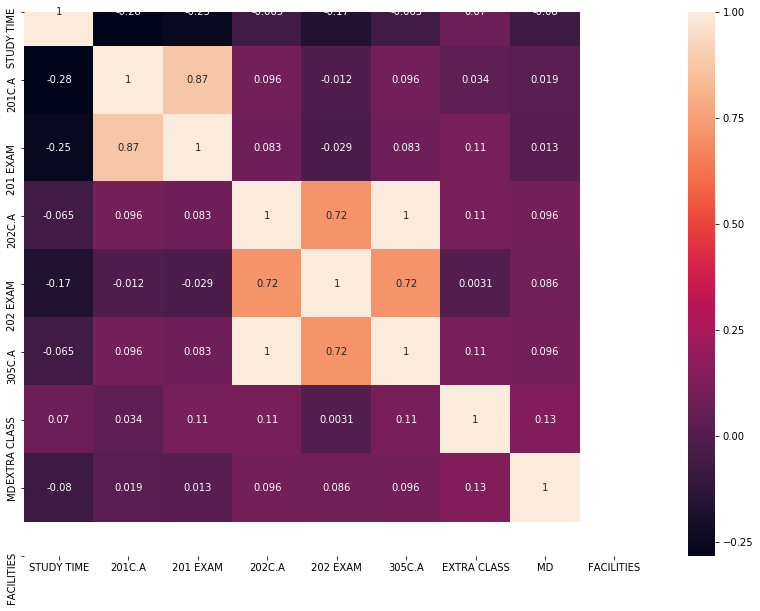

In [24]:
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
plt.figure(figsize = (14,10))
sns.heatmap(corr, annot=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3,random_state=109)

In [39]:
X_train.head()

STUDY TIME  201C.A  201 EXAM  202C.A  202 EXAM  305C.A  GENDER  RESOUCES  \
93           5      18        27      20         4      20       0         1   
68           2      19        27      20        20      20       1         0   
92           3      21        47      22        18      22       0         1   
80           1      20        42      20        20      20       1         0   
77           1      16        24      21        59      21       0         0   

    EXTRA CLASS  MD  
93            1   2  
68            0   0  
92            1   0  
80            0   0  
77            0   1

In [26]:
#Perform one hot encoding
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
# y_train  = pd.get_dummies(y_train)
# y_test  = pd.get_dummies(y_test)

NUERAL NETWORKS MODEL

In [27]:

#After multiple attempts, I was able to achieve best model with below configuration.
model = Sequential()
model.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.compile(optimizer='adam', metrics=['accuracy'])
history  = model.fit(X_train,y_train, epochs = 200, batch_size = 5, validation_data = (X_test,y_test))

Epoch 1/200
15/15 [==============================] - 1s 14ms/step - loss: 0.1154 - accuracy: 0.0685 - val_loss: 0.1038 - val_accuracy: 0.0312
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0947 - accuracy: 0.0822 - val_loss: 0.0848 - val_accuracy: 0.0312
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.0822 - val_loss: 0.0689 - val_accuracy: 0.0312
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0626 - accuracy: 0.0822 - val_loss: 0.0558 - val_accuracy: 0.0312
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0506 - accuracy: 0.0822 - val_loss: 0.0450 - val_accuracy: 0.0312
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0408 - accuracy: 0.0822 - val_loss: 0.0362 - val_accuracy: 0.0312
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.0822 - val_loss: 0.0290 - val_accuracy: 0.0312
Epoch 8/200


Epoch 55/200
15/15 [==============================] - 0s 6ms/step - loss: 6.5297e-09 - accuracy: 0.0137 - val_loss: 5.1844e-09 - val_accuracy: 0.0312
Epoch 56/200
15/15 [==============================] - 0s 7ms/step - loss: 4.2889e-09 - accuracy: 0.0137 - val_loss: 3.3959e-09 - val_accuracy: 0.0312
Epoch 57/200
15/15 [==============================] - 0s 6ms/step - loss: 2.8034e-09 - accuracy: 0.0137 - val_loss: 2.2135e-09 - val_accuracy: 0.0312
Epoch 58/200
15/15 [==============================] - 0s 12ms/step - loss: 1.8233e-09 - accuracy: 0.0137 - val_loss: 1.4355e-09 - val_accuracy: 0.0312
Epoch 59/200
15/15 [==============================] - 0s 10ms/step - loss: 1.1799e-09 - accuracy: 0.0137 - val_loss: 9.2628e-10 - val_accuracy: 0.0000e+00
Epoch 60/200
15/15 [==============================] - 0s 8ms/step - loss: 7.5966e-10 - accuracy: 0.0000e+00 - val_loss: 5.9459e-10 - val_accuracy: 0.0000e+00
Epoch 61/200
15/15 [==============================] - 0s 6ms/step - loss: 4.8653e-10 -

Epoch 107/200
15/15 [==============================] - 0s 4ms/step - loss: 4.1660e-22 - accuracy: 0.0000e+00 - val_loss: 2.6456e-22 - val_accuracy: 0.0312
Epoch 108/200
15/15 [==============================] - 0s 6ms/step - loss: 1.8634e-22 - accuracy: 0.0000e+00 - val_loss: 1.1757e-22 - val_accuracy: 0.0312
Epoch 109/200
15/15 [==============================] - 0s 6ms/step - loss: 8.2444e-23 - accuracy: 0.0000e+00 - val_loss: 5.1670e-23 - val_accuracy: 0.0312
Epoch 110/200
15/15 [==============================] - 0s 5ms/step - loss: 3.6072e-23 - accuracy: 0.0000e+00 - val_loss: 2.2454e-23 - val_accuracy: 0.0312
Epoch 111/200
15/15 [==============================] - 0s 5ms/step - loss: 1.5604e-23 - accuracy: 0.0000e+00 - val_loss: 9.6461e-24 - val_accuracy: 0.0312
Epoch 112/200
15/15 [==============================] - 0s 5ms/step - loss: 6.6724e-24 - accuracy: 0.0000e+00 - val_loss: 4.0954e-24 - val_accuracy: 0.0312
Epoch 113/200
15/15 [==============================] - 0s 5ms/step - l

Epoch 160/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0312
Epoch 161/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0312
Epoch 162/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0312
Epoch 163/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0312
Epoch 164/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0312
Epoch 165/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0312
Epoch 166/200
15/15 [==============================] - 0s 4ms/step - l

In [30]:
model.save('keras.h5')
# output = open('keras.pkl', 'wb')
# joblib.dump(model, output)
# output.close()

In [29]:
X_train.shape

(73, 9)

RANDOM FOREST MODEL

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [32]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [33]:
rfcmodel = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [36]:
CV_rfc = GridSearchCV(estimator=rfcmodel, param_grid=param_grid, cv= 5)

In [37]:
CV_rfc.fit(X_train, y_train)

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [40]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 500}

In [41]:
pipeline = Pipeline(steps=[('model', RandomForestClassifier(criterion= 'gini', 
                                                            max_depth= 6,
                                                            max_features= 'log2',
                                                            n_estimators= 500)
                           )])

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features='log2',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [44]:
y_predict = pipeline.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.25


In [ ]:
y_predict.shape

In [45]:
#classification error
print("Classification error is",1- metrics.accuracy_score(y_test, y_predict, normalize = True))
#sensitivity
print("sensitivity is", metrics.recall_score(y_test, y_predict, labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - metrics.recall_score(y_test, y_predict,labels=None, average =  'micro', sample_weight=None))

Classification error is 0.75
sensitivity is 0.25
specificity is 0.75


In [46]:
output = open('rfcmodel.pkl', 'wb')
joblib.dump(pipeline, output)
output.close()

In [47]:
y_predict

array([21, 46, 45, 54, 28, 18, 21, 26, 54, 26, 40, 45,  3, 21, 21, 54, 22,
       22, 22, 46, 46, 46, 21, 61, 20,  4,  4, 21,  4, 17, 41,  3])